In [1]:
from pycalphad import Database, equilibrium, calculate
from pycalphad import variables as v
from pycalphad.plot.eqplot import eqplot, phase_legend
import numpy as np
import matplotlib.pyplot as plt

In [2]:
db_path = "databases\\lab1\\Unary.tdb"

In [4]:
db = Database(db_path)

In [ ]:
# list(db.elements)

In [5]:
phases_names = db.phases.keys()

In [6]:
comps = ['CU', 'VA']

## 1
- Выбрать чистый элемент из предложенных : Mn (до 2000 К), Cu,  Ti, Co, Ni. Рассчитать зависимость фазового состава от температуры при помощи функции equilibrium, построить эту зависимость

## 1.2
- Рассчитать зависимость фазового состава от температуры при помощи функции equilibrium, построить эту зависимость.

In [7]:
eq = equilibrium(db, comps, list(phases_names), {v.P: 101325, v.T: (298.15, 3000, 100)})
print(eq)

C:\Users\callo\Miniconda3\envs\thermo\lib\site-packages\dask\base.py:828: UserWarning: The get= keyword has been deprecated. Please use the scheduler= keyword instead with the name of the desired scheduler like 'threads' or 'processes'
  warnings.warn("The get= keyword has been deprecated. "


<xarray.Dataset>
Dimensions:    (P: 1, T: 28, component: 1, internal_dof: 2, vertex: 1)
Coordinates:
  * P          (P) float64 1.013e+05
  * T          (T) float64 298.1 398.1 498.1 ... 2.798e+03 2.898e+03 2.998e+03
  * vertex     (vertex) int32 0
  * component  (component) <U2 'CU'
Dimensions without coordinates: internal_dof
Data variables:
    X          (P, T, vertex, component) float64 1.0 1.0 1.0 1.0 ... 1.0 1.0 1.0
    GM         (P, T) float64 -9.884e+03 -1.357e+04 ... -2.211e+05 -2.319e+05
    MU         (P, T, component) float64 -9.884e+03 -1.357e+04 ... -2.319e+05
    Y          (P, T, vertex, internal_dof) float64 1.0 1.0 1.0 ... nan 1.0 nan
    NP         (P, T, vertex) float64 1.0 1.0 1.0 1.0 1.0 ... 1.0 1.0 1.0 1.0
    Phase      (P, T, vertex) <U6 'FCC_A1' 'FCC_A1' ... 'LIQUID' 'LIQUID'
Attributes:
    engine:   pycalphad 0.6.1
    created:  2020-10-25T15:02:49.659432


In [8]:
eq_phases = np.unique(eq.Phase)
print('equilibrium phases:', eq_phases.tolist())

equilibrium phases: ['FCC_A1', 'LIQUID']


## 3
- Найти на этом графике Reference state, т.е. какая фаза для данного элемента является стабильной при комнатной температуре (298,15 К)

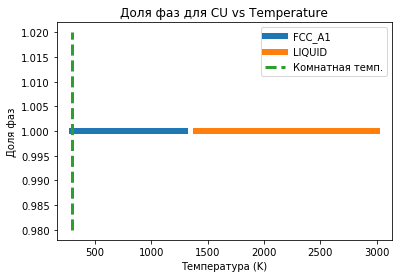

In [9]:
for phase in eq_phases:
    phase_T = eq.T.where(eq.Phase==phase)
    plt.plot(np.squeeze(phase_T), np.ones(phase_T.shape[0]), label=phase, linewidth=6)

plt.plot([298.15, 298.15], [0.98, 1.02], linestyle='dashed', linewidth=3, label='Комнатная темп.')
plt.ylabel('Доля фаз')
plt.xlabel('Температура (K)')
plt.title('Доля фаз для CU vs Temperature')
plt.legend()
plt.show()

Стабильная фаза для 'CU' при T=298,15  -  FCC_A1

## 4
- Получить график зависимости энергий Гиббса равновесных фаз от температуры (относительно Reference state- фазы, стабильной при 298,15 К) . Найти на этом графике температуры фазовых превращений, отметить для себя-какие фазы стабильны при разных температурах

In [10]:
legend_handles, colors = phase_legend(eq_phases)

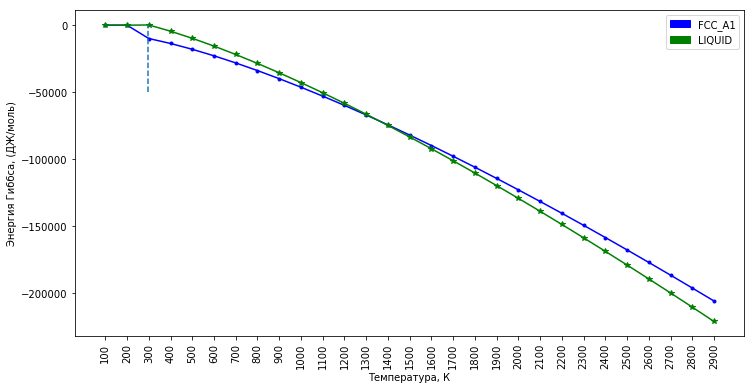

In [17]:
fig = plt.figure(figsize=(12, 6))
markers = ['.', '*', '1']
for index, phase_name in enumerate(eq_phases):
    result = calculate(db, comps, phases=list(eq_phases), P=101325, T=(100, 3000, 100))
    plt.plot(np.squeeze(result.T), np.squeeze(result.GM)[:, index], marker=markers[index], color=colors[phase_name])

plt.plot([298.15, 298.15], [-5e4, 0], linestyle='dashed', label='Комнатная темп.')
plt.xlabel('Температура, К')
plt.ylabel('Энергия Гиббса, (ДЖ/моль)')
plt.xticks(range(100, 3000, 100), rotation=90)
plt.legend(handles=legend_handles)
plt.show()

## 5
- Построить на одном графике зависимости теплоемкостей от температуры для всех равновесных фаз. Предложить, с чем могут быть связаны изломы (если они есть) на кривых зависимости  теплоемкости от температуры 

In [12]:
heat_cap_result = calculate(db, comps, phases=list(eq_phases), P=101325, T=(298.15, 3000, 100), output='heat_capacity')

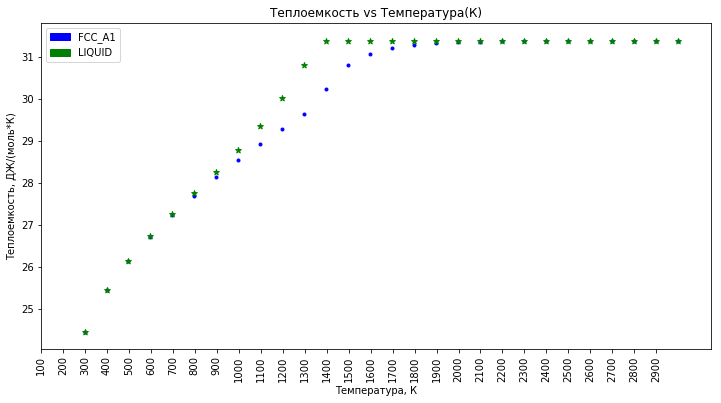

In [19]:
fig = plt.figure(figsize=(12, 6))

for index, phase_name in enumerate(eq_phases):
    plt.scatter(np.squeeze(heat_cap_result.T), np.squeeze(heat_cap_result.heat_capacity)[:, index], 
                color=colors[phase_name], marker=markers[index])

plt.xlabel('Температура, К')
plt.ylabel('Теплоемкость, ДЖ/(моль*К)')
plt.title('Теплоемкость vs Температура(К)')
plt.xticks(range(100, 3000, 100), rotation=90)
plt.legend(handles=legend_handles)
plt.show()

молярная масса меди = 63,546 г/моль
теплоемкость дж/(моль*кельвин)
ДЖ/(Кг*кельвин)


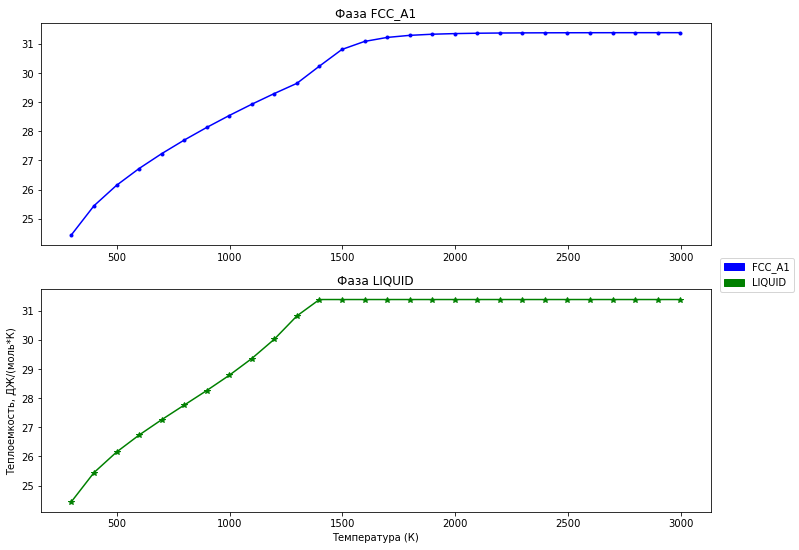

In [20]:
rows = eq_phases.shape[0]
fig, axes = plt.subplots(nrows=rows, figsize=(12, 9))
for index, phase_name in enumerate(eq_phases):
    axes[index].plot(np.squeeze(heat_cap_result.T), np.squeeze(heat_cap_result.heat_capacity)[:, index], 
                color=colors[phase_name], marker=markers[index])
    axes[index].set_title('Фаза ' + phase_name)
fig.legend(handles=legend_handles, loc='center right')
plt.xlabel('Температура (К)')
plt.ylabel('Теплоемкость, ДЖ/(моль*К)', )
plt.show()

## 6
- Построить зависимость энтальпий фаз от температуры. Найти на этом графике энтальпии всех фаз при комнатной температуре и энтальпию плавления

In [15]:
ent_result = calculate(db, comps, phases=list(eq_phases), P=101325, T=(298.15, 3000, 20), output='enthalpy')

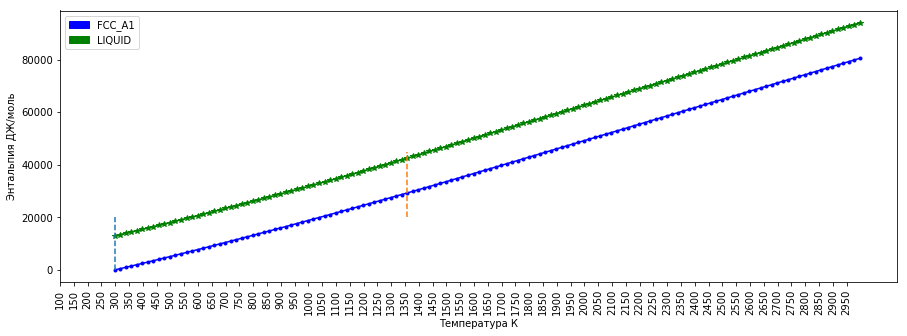

In [40]:
fig = plt.figure(figsize=(15, 5))

for index, phase_name in enumerate(eq_phases):
    plt.plot(np.squeeze(ent_result.T), np.squeeze(ent_result.enthalpy)[:, index], 
                color=colors[phase_name], marker=markers[index])

plt.plot([298.15, 298.15], [0, 2e4], linestyle='dashed') # Комнатная температура
plt.plot([1358.15, 1358.15], [2e4, 4.5e4], linestyle='dashed') # Температура плавления

plt.xlabel('Температура К')
plt.ylabel('Энтальпия ДЖ/моль')
plt.xticks(range(100, 3000, 50), rotation=90)
plt.legend(handles=legend_handles)
plt.show()

Разница этальпий фаз LIQUID и FCC_1 

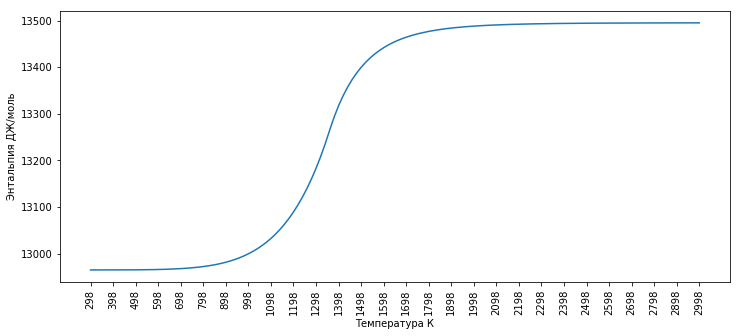

In [32]:
plt.figure(figsize=(12, 5))
plt.plot(ent_result.T, np.squeeze(ent_result.enthalpy)[:, 1] - np.squeeze(ent_result.enthalpy)[:, 0])
plt.xticks(range(298, 3000, 100), rotation=90)
plt.ylabel('Энтальпия ДЖ/моль')
plt.xlabel('Температура К')
plt.show()

## 7
- Найти температуру плавления. Рассчитать энтальпию плавления при помощи функции equilibrium


- Температура плавления Cu = 1 085 *C $=>$ 1358.15 K

In [61]:
# Функция equilibrim для данного рассчета выдает ошибку, поэтому я использовал calculate
eq_melting = calculate(db, comps, list(eq_phases), P=101325, T=1358.15, output='enthalpy')

In [109]:
print('Энтальпия плавления Cu при Т = 1358.15 К.')

for phase in np.squeeze(eq_melting.Phase).data:
    print('\tДля фазы {} : '.format(phase), np.squeeze(eq_melting.enthalpy)[np.squeeze(eq_melting.Phase)==phase].data[0])

Энтальпия плавления Cu при Т = 1358.15 К.
	Для фазы FCC_A1 :  29308.338274440976
	Для фазы LIQUID :  42572.202000000005
